
Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 348144      6


,HKNPC.089N.bam,HKNPC.089T.bam,HKNPC.090N.bam,HKNPC.090T.bam,HKNPC.101N.bam,HKNPC.101T.bam
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAAAAA:0:Context,-5.4715221,-5.425132,-5.0133727,-5.1732496,-2.879385,-4.6939146
AAAAAA:1:Context,-4.3741150,-4.696121,-3.9392298,-4.3180576,-2.674737,-4.0521737
AAAAAA:2:Context,-3.8759790,-3.848641,-3.7618405,-3.6596104,-3.646040,-3.8717846
AAAAAC:0:Context,-0.5263569,-1.204219,-0.3450135,-0.9882953,-2.078591,-0.8098766
AAAAAC:1:Context,-3.1460122,-3.467122,-2.9223577,-3.3260921,-4.131508,-3.1780240


 HKNPC.089N.bam    HKNPC.089T.bam    HKNPC.090N.bam    HKNPC.090T.bam    
 Min.   :-18.901   Min.   :-18.076   Min.   :-19.969   Min.   :-18.5805  
 1st Qu.: -1.595   1st Qu.: -2.059   1st Qu.: -1.930   1st Qu.: -1.5907  
 Median :  0.009   Median : -0.674   Median : -0.271   Median : -0.1772  
 Mean   : -0.104   Mean   : -0.654   Mean   : -0.431   Mean   : -0.1435  
 3rd Qu.:  1.703   3rd Qu.:  1.091   3rd Qu.:  1.434   3rd Qu.:  1.6129  
 Max.   : 12.626   Max.   : 14.011   Max.   : 13.024   Max.   : 11.7572  
 NA's   :10403     NA's   :3703      NA's   :8255      NA's   :1446      
 HKNPC.101N.bam    HKNPC.101T.bam    
 Min.   :-19.620   Min.   :-17.1617  
 1st Qu.: -1.571   1st Qu.: -1.2248  
 Median :  0.065   Median :  0.7013  
 Mean   : -0.113   Mean   :  0.5499  
 3rd Qu.:  1.650   3rd Qu.:  2.3785  
 Max.   : 13.390   Max.   : 13.4176  
 NA's   :9935      NA's   :2166      

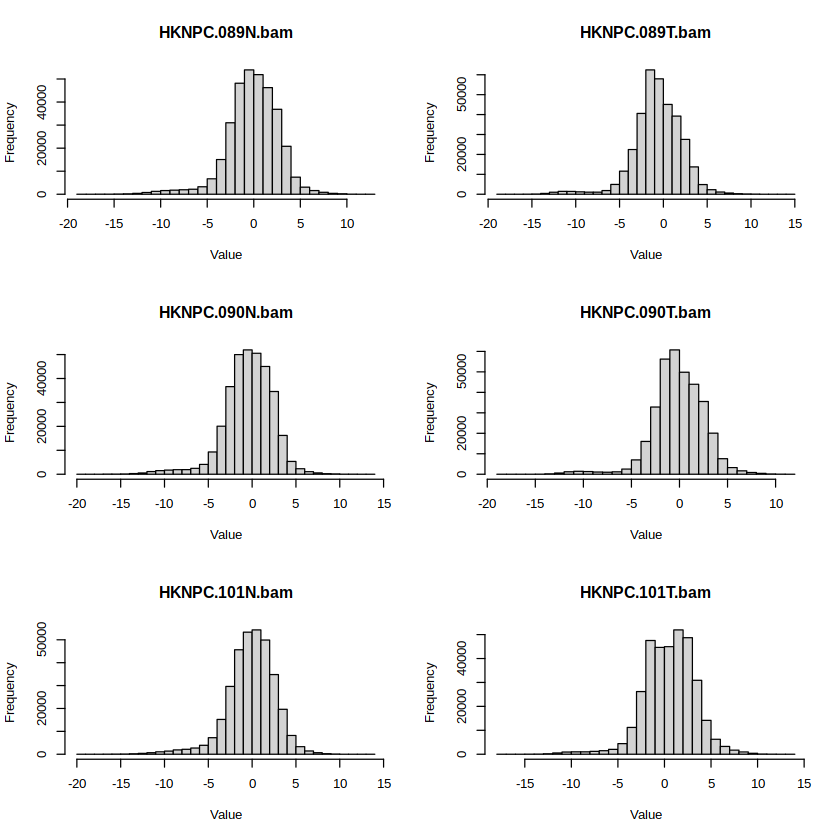

In [1]:
library(dplyr) # for functions

profiles_dir <- "/home/ido/br_stat_profiler/qerr_profiles"
profile <- "All.GATKReport.mm_cntxt.6.profile.raw.csv"
# profile <- "All.autosomes.bam.GATKReport.mm_cntxt.4.profile.raw.csv"
file_path <- file.path(profiles_dir, profile)
profile_df <- read.csv(file_path, na.strings = "",, row.names = 1)
print(dim(profile_df))
head(profile_df,5)
par(mfrow = c(3, 2))  # Set the plot layout to 2x2
for (col in 1:ncol(profile_df)) {
  hist(profile_df[, col], main = colnames(profile_df)[col], xlab = "Value", breaks = 40)
}
summary(profile_df)

In [2]:
invisible(capture.output({
    library(matrixStats)
}))
ALL_ROWS = -1
get_top_sds <- function(sds_count, df) {
    sds <- rowSds(as.matrix(df), na.rm = TRUE)
    o <- order(sds, decreasing = TRUE)
    
    if (sds_count == ALL_ROWS) {
        return(df[o,])
    }
    df[o[1:sds_count],]
}
# get_top_sds(ALL_ROWS, p_z_complete_cases_df)



Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count




In [3]:
CUTOFF <-2
TOP_SDS <- 10
profile_df[abs(profile_df) < CUTOFF] <- NA
prf_z_complete_cases_df = profile_df[complete.cases(profile_df), ] %>%  
                        scale() %>% 
                            as.data.frame() %>% mutate_all(~as.numeric(.))


Loading required package: ggplot2



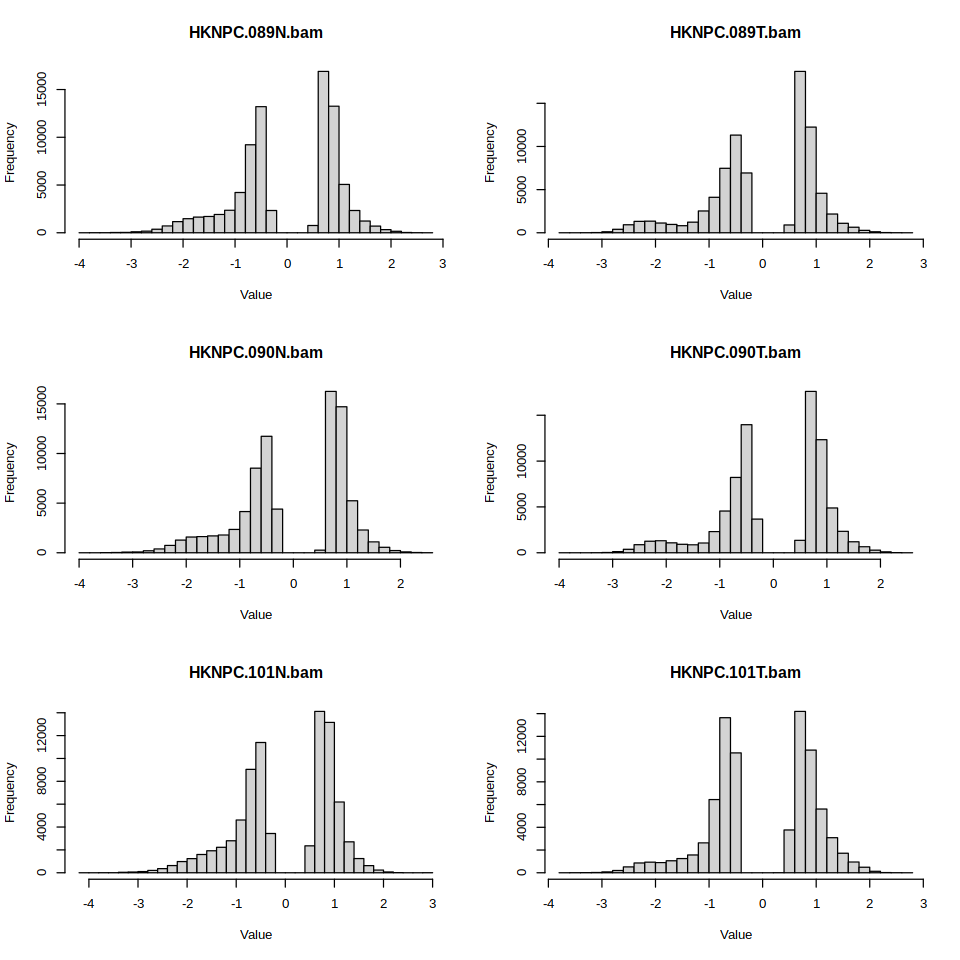

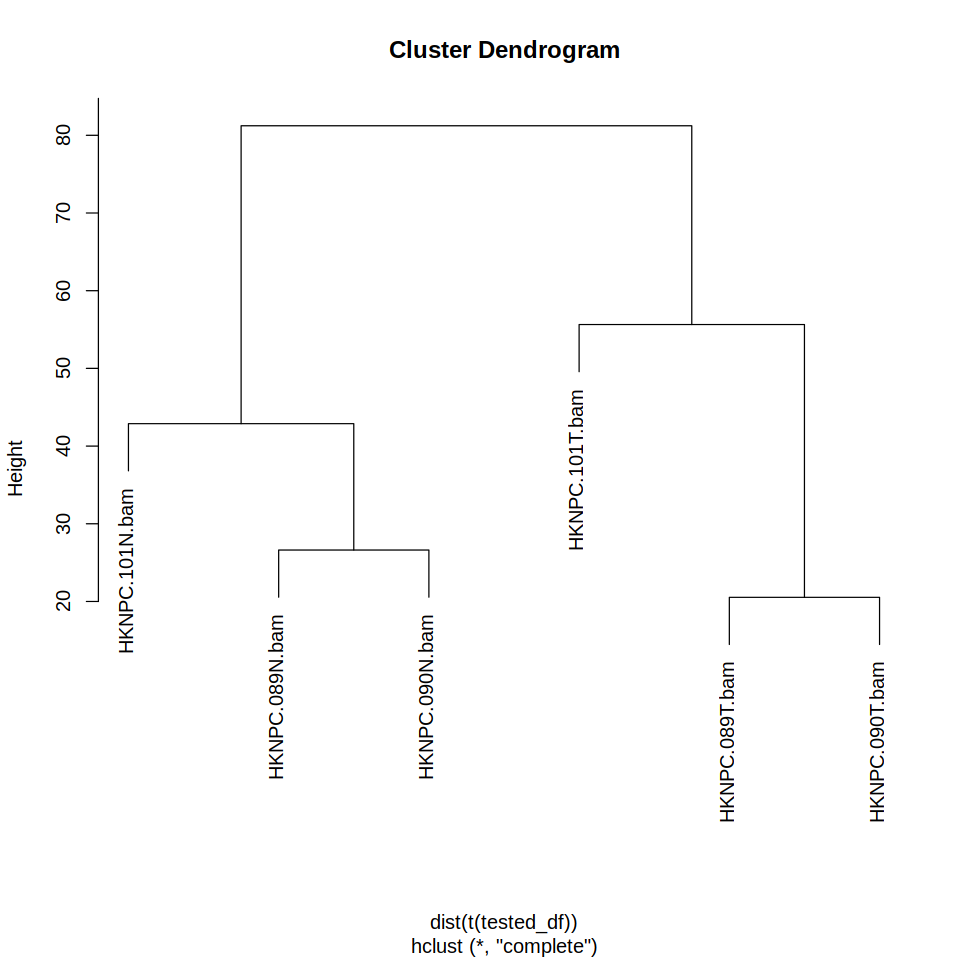

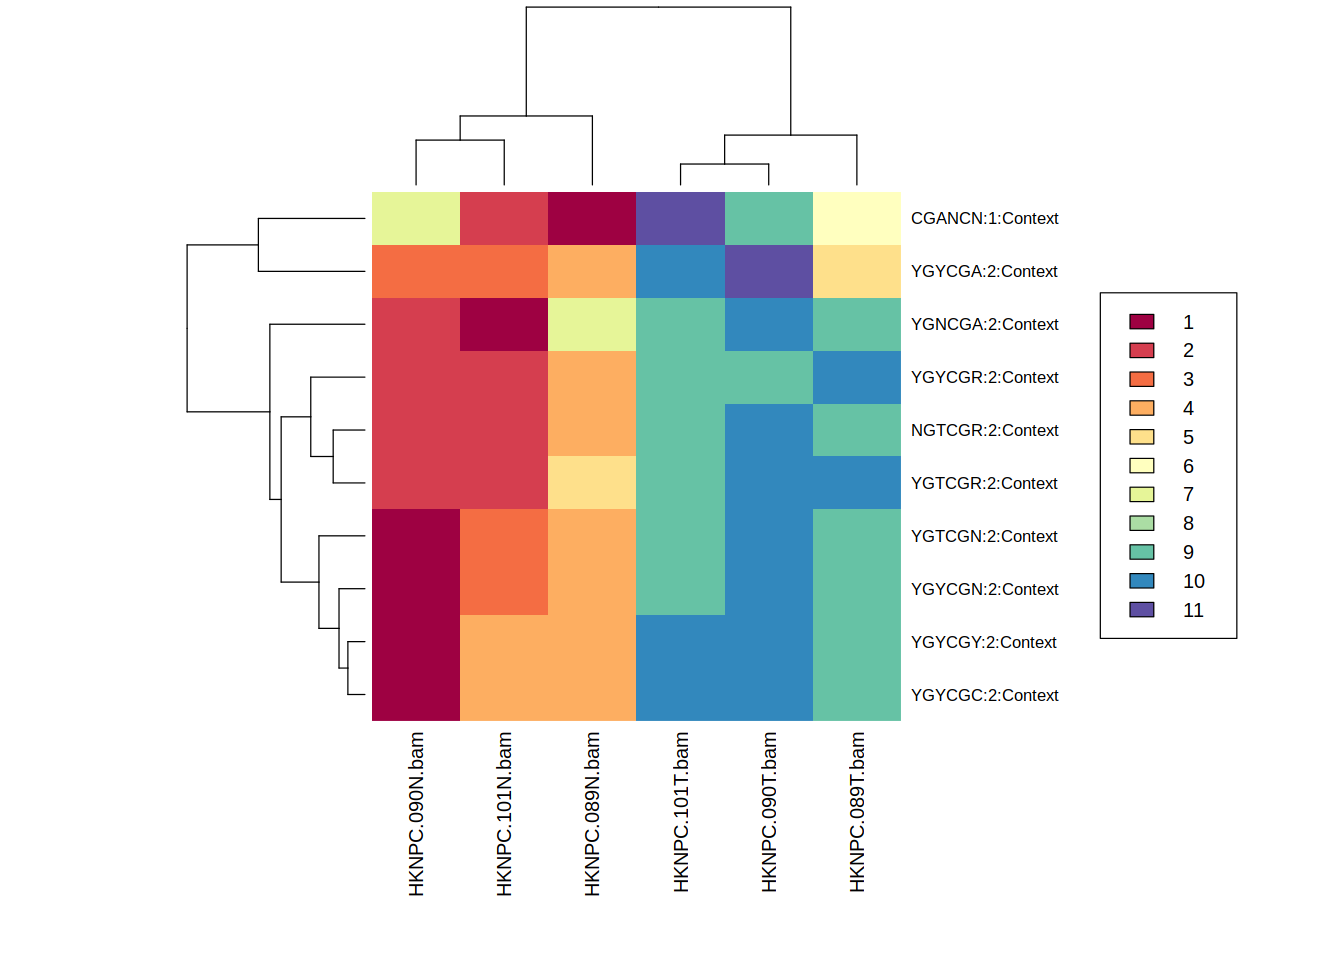

In [4]:
invisible(capture.output({
  library(ggcorrplot)
  library(ggplot2)
}))

suppressWarnings({
  tested_df = prf_z_complete_cases_df
  options(repr.plot.width = 8, repr.plot.height = 8)

  par(mfrow = c(3, 2))  # Set the plot layout to 2x2
  for (col in 1:ncol(tested_df)) {
    hist(tested_df[, col], main = colnames(tested_df)[col], xlab = "Value", breaks = 40)
  }
  options(repr.plot.width = 8, repr.plot.height = 8)

  # hclustering
  hc_result <- hclust(dist(t(tested_df)))
  par(mfrow = c(1,1))
  plot(hc_result)
  options(repr.plot.width = 8, repr.plot.height = 8)
  # Higher SD
  heatmap(as.matrix(get_top_sds(TOP_SDS, tested_df)),  
    cexRow = 1, cexCol = 1.2, margins =c(12,12),Rowv = NULL, 
    col = RColorBrewer::brewer.pal(11, "Spectral"))
  legend(x="right", legend=seq(1,11),fill=RColorBrewer::brewer.pal(11, "Spectral"))
  options(repr.plot.width = 11, repr.plot.height = 8)

  # options(repr.plot.width = 8, repr.plot.height = 8)
})
# heatmap(as.matrix(tested_df)[o,],  cexRow = 1, cexCol = 1.2, margins =c(12,12), col = RColorBrewer::brewer.pal(11, "Spectral"))

In [5]:
prf_z_sorted_by_var <- get_top_sds(ALL_ROWS, prf_z_complete_cases_df)
prf_top_var <- head(prf_z_sorted_by_var,TOP_SDS)
cat("# Z scored data")
prf_top_var
cat("\n\n")
cat("# Original data")
profile_df[rownames(prf_top_var),]

# Z scored data

,HKNPC.089N.bam,HKNPC.089T.bam,HKNPC.090N.bam,HKNPC.090T.bam,HKNPC.101N.bam,HKNPC.101T.bam
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
YGYCGR:2:Context,-2.373527,-0.4217522,-3.150284,-0.5110897,-3.244383,-0.6050071
NGTCGR:2:Context,-2.373527,-0.8475009,-3.150284,-0.4696915,-3.244383,-0.9577344
YGYCGN:2:Context,-2.341210,-0.5404846,-3.089024,-0.4653252,-2.606282,-0.5192533
YGYCGY:2:Context,-2.326714,-0.6231771,-3.055217,-0.4344090,-2.339038,-0.4779400
YGNCGA:2:Context,-1.318046,-0.7862687,-2.683403,-0.4583135,-3.244383,-0.7069400
YGTCGR:2:Context,-2.373527,-0.8475009,-3.150284,-0.8867790,-3.244383,-1.1916953
YGYCGC:2:Context,-2.326714,-0.7747447,-3.055217,-0.5921575,-2.339038,-0.6120474
CGANCN:1:Context,-3.330392,-2.1779818,-1.791424,-1.0733560,-3.082524,-0.6319637
YGYCGA:2:Context,-2.863294,-2.4786683,-3.150284,-0.8199282,-3.244383,-1.2115013




# Original data

,HKNPC.089N.bam,HKNPC.089T.bam,HKNPC.090N.bam,HKNPC.090T.bam,HKNPC.101N.bam,HKNPC.101T.bam
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
YGYCGR:2:Context,-11.918435,-2.753480,-16.163795,-2.738092,-16.01601,-2.645851
NGTCGR:2:Context,-11.918435,-4.760823,-16.163795,-2.546599,-16.01601,-4.292187
YGYCGN:2:Context,-11.762639,-3.313286,-15.866589,-2.526402,-12.97611,-2.245600
YGYCGY:2:Context,-11.692751,-3.703169,-15.702570,-2.383396,-11.70295,-2.052772
YGNCGA:2:Context,-6.830004,-4.472122,-13.898685,-2.493969,-16.01601,-3.121617
YGTCGR:2:Context,-11.918435,-4.760823,-16.163795,-4.475890,-16.01601,-5.384187
YGYCGC:2:Context,-11.692751,-4.417788,-15.702570,-3.113081,-11.70295,-2.678711
CGANCN:1:Context,-16.531445,-11.033848,-9.571173,-5.338925,-15.24492,-2.771670
YGYCGA:2:Context,-14.279585,-12.451542,-16.163795,-4.166663,-16.01601,-5.476631


In [23]:
add_t_test <- function(df){
    tumor_cols <- colnames(df)[grep("T\\.bam$", colnames(df))]
    normal_cols <- colnames(df)[grep("N\\.bam$", colnames(df))]

    p_values <- apply(df, 1, function(row) {
    ttest_result <- t.test(row[tumor_cols], row[normal_cols])
    ttest_result$p.value
    })
    t_test_df = data.frame(df)
    t_test_df["T-Test"] = p_values
    return(t_test_df)
} 
prf_t_test_df <- add_t_test(prf_z_complete_cases_df)
split_values <- strsplit(rownames(prf_t_test_df),":")
prf_t_test_df[,"K-mer"] <- sapply(split_values, function(x) x[1])
prf_t_test_df[,"ScrBin"] <- sapply(split_values, function(x) x[2])

In [274]:
wobble_dict = c(
        'N' = "[ACGT]", 
        'R' = "[AG]",
        'Y' = "[CT]",
        'M' = "[AC]", 
        'W' = "[AT]", 
        'S' = "[CG]",
        'K' = "[GT]",
        'V' = "[ACG]",
        'D' = "[AGT]",
        'B' = "[CGT]"
        )

# Function to replace letters in a string using a dictionary
replace_letters <- function(string, dictionary) {
  # Split the string into individual characters
  characters <- strsplit(string, "")[[1]]
  
  # Replace the characters with dictionary values
  replaced <- sapply(characters, function(char) {
    if (char %in% names(dictionary)) {
      return(dictionary[[char]])
    } else {
      return(char)
    }
  })
  
  # Combine the replaced characters back into a string
  replaced_string <- paste0(replaced, collapse = "")
  
  return(replaced_string)
}

is_wobble_match <- function(wobble_k_mer, k_mer, dict=wobble_dict) {
    regex_string <-paste0("^",replace_letters(wobble_k_mer,dict),"$")
    return (grepl(regex_string, k_mer))
}

vec_is_wobble_match <- Vectorize(is_wobble_match, vectorize.args = "k_mer")


In [ ]:
is_match <- function(kmer, df_below) {
  any(kmer > df_below$`K-mer`)
}

In [276]:
head_test <- head(prf_t_test_df)

In [ ]:
# as.char(head_test["ScrBin"])
df_filtered <- head_test %>% 
  group_by(ScrBin) %>%  mutate(delete_row =FALSE) %>% 
    mutate(delete_row = sapply(seq_along(.$'K-mer'), function(i) { 
      if (i==1){
        .$delete_row or FALSE
        }else{
          print(i)
          print(.$'K-mer'[i-1])
          print(.$'K-mer'[(i ):n()])
          vec_is_wobble_match(.$'K-mer'[i-1],.$'K-mer'[(i ):n()])
          # TRUE
          }
          })) 
          # %>% filter(delete_row == TRUE) %>% select(-delete_row)
df_filtered

In [247]:
# Load required packages
library(dplyr)

# Create an example dataframe
df <- data.frame(
  A = c("Group1", "Group1", "Group1", "Group2", "Group2", "Group2"),
  B = c("Value1", "Value2", "Value3", "Value4", "Value5", "Value6"),
  C = c(1, 2, 3, 4, 5, 6)
)

# Function to check if B values match using is_match
is_match <- function(b_val, b1_vals) {
  # Add your comparison logic here
  # For example, check if b_val matches any value in b1_vals
    print(bval)
    print(b1_vals)
   print(any(b_val == b1_vals))
  any(b_val == b1_vals)
}
print(df)
# Group by A and perform the comparison and deletion
df_filtered <- df %>%
  group_by(A) %>%
  mutate(delete_row = sapply(seq_along(B), function(i) { 
      if (i==1){
        FALSE
        }else{
          print(i)
          print(B[i-1])
          print(B[(i ):n()])
          is_wobble_match(B[i-1],)
          TRUE
          }
          })) %>% filter(delete_row == TRUE) %>% select(-delete_row)

# Print the filtered dataframe
print(df_filtered)


       A      B C
1 Group1 Value1 1
2 Group1 Value2 2
3 Group1 Value3 3
4 Group2 Value4 4
5 Group2 Value5 5
6 Group2 Value6 6
[1] 2
[1] "Value1"
[1] "Value2" "Value3"
[1] 3
[1] "Value2"
[1] "Value3"
[1] 2
[1] "Value4"
[1] "Value5" "Value6"
[1] 3
[1] "Value5"
[1] "Value6"
# A tibble: 4 × 3
# Groups:   A [2]
  A      B          C
  <chr>  <chr>  <dbl>
1 Group1 Value2     2
2 Group1 Value3     3
3 Group2 Value5     5
4 Group2 Value6     6


In [238]:
as.character(head_test["ScrBin"])

[1] "c(\"0\", \"1\", \"2\", \"1\", \"2\", \"1\")"

In [275]:
# as.char(head_test["ScrBin"])
df_filtered <- head_test %>% 
  group_by(ScrBin) %>% 
    mutate(delete_row = sapply(seq_along(.$'K-mer'), function(i) { 
      if (i==1){
        FALSE
        }else{
          print(i)
          print(.$'K-mer'[i-1])
          print(.$'K-mer'[(i ):n()])
          vec_is_wobble_match(.$'K-mer'[i-1],.$'K-mer'[(i ):n()])
          # TRUE
          }
          })) 
          # %>% filter(delete_row == TRUE) %>% select(-delete_row)
df_filtered

[1] 2
[1] "AAAAAA"
[1] "AAAAAA" "AAAAAA"
[1] 3
[1] "AAAAAA"
[1] "AAAAAA" "AAAAAA" "AAAAAA"
[1] 4
[1] "AAAAAA"
[1] "AAAAAC" "AAAAAA" "AAAAAA" "AAAAAA"
[1] 5
[1] "AAAAAC"
[1] "AAAAAC" "AAAAAC" "AAAAAA" "AAAAAA" "AAAAAA"
[1] 6
[1] "AAAAAC"
[1] "AAAAAG" "AAAAAC" "AAAAAC" "AAAAAA" "AAAAAA" "AAAAAA"


ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `delete_row = sapply(...)`.
[36mℹ[39m In group 1: `ScrBin = "0"`.
[1mCaused by error:[22m
[1m[22m[33m![39m `delete_row` must be size 1, not 6.


In [118]:
df_filtered <- head_test %>%
  group_by("ScrBin") %>% 
  mutate(delete_row = cumsum(is_wobble_match(.$`K-mer`, lead(.$`K-mer`))))

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `delete_row = cumsum(is_wobble_match(.$`K-mer`,
  lead(.$`K-mer`)))`.
[36mℹ[39m In group 1: `"ScrBin" = "ScrBin"`.
[1mCaused by error in `h()`:[22m
[33m![39m error in evaluating the argument 'table' in selecting a method for function '%in%': argument "wobble_dict" is missing, with no default


In [115]:
df_filtered <- head_test %>%
  group_by("ScrBin") %>%
  mutate(delete_row = cumsum(is_wobble_match(.$`K-mer`, lead(.$`K-mer`)))) %>%
  filter(delete_row == 0) %>%
  select(-delete_row)

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `delete_row = cumsum(is_wobble_match(.$`K-mer`,
  lead(.$`K-mer`)))`.
[36mℹ[39m In group 1: `"ScrBin" = "ScrBin"`.
[1mCaused by error in `is_wobble_match()`:[22m
[33m![39m could not find function "is_wobble_match"


In [114]:
df <- head_test %>%
  group_by("ScrBin") %>% rowwise() %>% do(print(.$`K-mer`))
df

[1] "AAAAAA"
[1] "AAAAAA"
[1] "AAAAAA"
[1] "AAAAAC"
[1] "AAAAAC"
[1] "AAAAAG"


ERROR: [1m[33mError[39m in `do()`:[22m
[1m[22m[33m![39m Results 1, 2, 3, 4, 5, 6 must be data frames, not character.


In [24]:
head(prf_t_test_df)

df <- prf_t_test_df %>%
  group_by("ScrBin") %>%
  mutate(delete = rowwise() %>% 
           do(is_match(kmer = .$`K-mer`, df_below = slice(., seq_len(n() - row_number() + 1))[-1, ]))) %>%
  filter(!delete) %>%
  ungroup() %>%
  select(-delete)

,HKNPC.089N.bam,HKNPC.089T.bam,HKNPC.090N.bam,HKNPC.090T.bam,HKNPC.101N.bam,HKNPC.101T.bam,T-Test,K-mer,ScrBin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
AAAAAA:0:Context,-1.0362592,-0.9883978,-0.8519773,-1.0375391,-0.4869009,-1.0438044,0.28729422,AAAAAA,0
AAAAAA:1:Context,-0.8086268,-0.8337778,-0.6305768,-0.8526577,-0.4439436,-0.9063115,0.14875267,AAAAAA,1
AAAAAA:2:Context,-0.7052997,-0.6540311,-0.5940136,-0.7103100,-0.6478279,-0.8676632,0.27784368,AAAAAA,2
AAAAAC:1:Context,-0.5538844,-0.5731126,-0.4209808,-0.6382077,-0.7497314,-0.7190250,0.56193801,AAAAAC,1
AAAAAC:2:Context,-1.2092347,-1.1348168,-1.1206957,-1.2110909,-1.3493258,-1.3947705,0.85074799,AAAAAC,2
AAAAAG:1:Context,-0.7024649,-1.0177591,-0.6642844,-0.9628557,-0.4859600,-0.7610096,0.04606749,AAAAAG,1


In [14]:

split_values <- strsplit(as.character(prf_t_test_df[,0]), ":")
split_values

list()

In [6]:
prf_top_var_id <- rownames(prf_top_var) 
prf_top_var_id
first_tokens <- sapply(prf_top_var_id, function(x) strsplit(x, ":")[[1]][1])
first_tokens

[1] "YGYCGR:2:Context" "NGTCGR:2:Context" "YGYCGN:2:Context" "YGYCGY:2:Context"
 [5] "YGNCGA:2:Context" "YGTCGR:2:Context" "YGYCGC:2:Context" "CGANCN:1:Context"
 [9] "YGYCGA:2:Context" "YGTCGN:2:Context"

YGYCGR:2:Context NGTCGR:2:Context YGYCGN:2:Context YGYCGY:2:Context 
        "YGYCGR"         "NGTCGR"         "YGYCGN"         "YGYCGY" 
YGNCGA:2:Context YGTCGR:2:Context YGYCGC:2:Context CGANCN:1:Context 
        "YGNCGA"         "YGTCGR"         "YGYCGC"         "CGANCN" 
YGYCGA:2:Context YGTCGN:2:Context 
        "YGYCGA"         "YGTCGN"

In [7]:
library(DECIPHER)
library(IRdisplay)
# db <- DNAStringSetDb(first_tokens)
dna_sequences <- DNAStringSet(first_tokens)

aligned <- AlignSeqs(dna_sequences, alphabet = DNA_ALPHABET, verbose=FALSE)
html_file <- paste("/home/ido/br_stat_profiler", "/myXStringSet.html", sep = "")
html_file
# DNA_colors <- c("#1E90FF", "#32CD32", "#9400D3", "black", "#EE3300")
# BrowseSeqs(aligned, highlight=0, openURL=interactive(),htmlFile=html_file, colors=DNA_colors)
BrowseSeqs(aligned, highlight=0, openURL=interactive(),htmlFile=html_file, patterns="-", colors="black")

Loading required package: Biostrings

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following objects are masked from ‘package:base’:

    expan

[1] "/home/ido/br_stat_profiler/myXStringSet.html"

In [8]:

BrowseSeqs(aligned, highlight=0, openURL=interactive(),htmlFile=html_file)
writeXStringSet(aligned, "aligned.seqs.txt")
# print(aligned)
alignment_matrix <- as(aligned, "matrix")
alignment_matrix

YGYCGR:2:Context,Y,G,Y,C,G,R,-,-,-
NGTCGR:2:Context,N,G,T,C,G,R,-,-,-
YGYCGN:2:Context,Y,G,Y,C,G,N,-,-,-
YGYCGY:2:Context,Y,G,Y,C,G,Y,-,-,-
YGNCGA:2:Context,Y,G,N,C,G,A,-,-,-
YGTCGR:2:Context,Y,G,T,C,G,R,-,-,-
YGYCGC:2:Context,Y,G,Y,C,G,C,-,-,-
CGANCN:1:Context,-,-,-,C,G,A,N,C,N
YGYCGA:2:Context,Y,G,Y,C,G,A,-,-,-
YGTCGN:2:Context,Y,G,T,C,G,N,-,-,-


In [9]:
 paste(tempdir(), "/myXStringSet.html", sep = "")

[1] "/tmp/RtmpQqc7Ym/myXStringSet.html"